In [31]:
from matplotlib import pyplot as plt
from scipy import stats
import numpy as np
import pandas as pd
from collections import Counter             # Used to tally the languages
from itertools import chain

In [32]:
# Two versions of the file - Edited is a slimed down version and full is the unedited version
file = ("Resources/survey_results_2021_edited.csv")          # Slimed down
df = pd.read_csv(file)                                     # Read into df  pandas dataframe
df.head(1)


,ResponseId,MainBranch,Country,US_State,UK_Country,LanguageHaveWorkedWith,LanguageWantToWorkWith,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,Age,Gender,Sexuality,Ethnicity
0,1,I am a developer by profession,Slovakia,NaN,NaN,C++;HTML/CSS;JavaScript;Objective-C;PHP;Swift,Swift,PostgreSQL;SQLite,SQLite,25-34 years old,Man,Straight / Heterosexual,White or of European descent


In [33]:
# Second file that we could use - has all data with no columns removed
full_file = ("Resources/survey_results_public.csv")           # Unedited file
full_df = pd.read_csv(full_file)                              # Read into full_df pandas dataframe
full_df.head(1)

,ResponseId,MainBranch,Employment,Country,US_State,UK_Country,EdLevel,Age1stCode,LearnCode,YearsCode,...,Age,Gender,Trans,Sexuality,Ethnicity,Accessibility,MentalHealth,SurveyLength,SurveyEase,ConvertedCompYearly
0,1,I am a developer by profession,"Independent contractor, freelancer, or self-em...",Slovakia,NaN,NaN,"Secondary school (e.g. American high school, G...",18 - 24 years,Coding Bootcamp;Other online resources (ex: vi...,NaN,...,25-34 years old,Man,No,Straight / Heterosexual,White or of European descent,None of the above,None of the above,Appropriate in length,Easy,62268.0


In [34]:
# Dropping columns from df that will not be used.  Might keep this? - Deleted Drop


 # Working to split language up so we can count how many people use which lanaguge 
df.dropna(axis='index', how='all', subset=['LanguageHaveWorkedWith'])
df.rename(columns={ 'MainBranch': 'Main Branch', 'LanguageHaveWorkedWith': 'Languages Learned', 'LanguageWantToWorkWith': 'Future Goal Language'}, inplace=True)

In [35]:
# This fills in missing data from the data frame with "Not Applicable"
df.replace(np.nan, "Not Applicable").head(5)
full_df.replace(np.nan, "Not Applicable").head(5)
# df.fillna('Not Applicable')



,ResponseId,MainBranch,Employment,Country,US_State,UK_Country,EdLevel,Age1stCode,LearnCode,YearsCode,...,Age,Gender,Trans,Sexuality,Ethnicity,Accessibility,MentalHealth,SurveyLength,SurveyEase,ConvertedCompYearly
0,1,I am a developer by profession,"Independent contractor, freelancer, or self-em...",Slovakia,Not Applicable,Not Applicable,"Secondary school (e.g. American high school, G...",18 - 24 years,Coding Bootcamp;Other online resources (ex: vi...,Not Applicable,...,25-34 years old,Man,No,Straight / Heterosexual,White or of European descent,None of the above,None of the above,Appropriate in length,Easy,62268
1,2,I am a student who is learning to code,"Student, full-time",Netherlands,Not Applicable,Not Applicable,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,"Other online resources (ex: videos, blogs, etc...",7,...,18-24 years old,Man,No,Straight / Heterosexual,White or of European descent,None of the above,None of the above,Appropriate in length,Easy,Not Applicable
2,3,"I am not primarily a developer, but I write co...","Student, full-time",Russian Federation,Not Applicable,Not Applicable,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,"Other online resources (ex: videos, blogs, etc...",Not Applicable,...,18-24 years old,Man,No,Prefer not to say,Prefer not to say,None of the above,None of the above,Appropriate in length,Easy,Not Applicable
3,4,I am a developer by profession,Employed full-time,Austria,Not Applicable,Not Applicable,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",11 - 17 years,Not Applicable,Not Applicable,...,35-44 years old,Man,No,Straight / Heterosexual,White or of European descent,I am deaf / hard of hearing,Not Applicable,Appropriate in length,Neither easy nor difficult,Not Applicable
4,5,I am a developer by profession,"Independent contractor, freelancer, or self-em...",United Kingdom of Great Britain and Northern I...,Not Applicable,England,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",5 - 10 years,Friend or family member,17,...,25-34 years old,Man,No,Not Applicable,White or of European descent,None of the above,Not Applicable,Appropriate in length,Easy,Not Applicable


In [36]:
# gender_groupby = clean_df.groupby(["Gender"])
# gender_groupby.sum()
# clean_df["Gender"].value_counts()
# men = clean_df.loc[clean_df["Gender"]=="Man"]
# women = clean_df.loc[clean_df["Gender"]=="Woman"]
# non_binary = clean_df.loc[clean_df["Gender"]=="Non-Binary"]


In [37]:
#TODO: Clean up or combine loops

# Pull series LanguageHaveWorkedWith and find the top 20 popular languages
# Isolate Column - split langs into a list - count number of repeats?
   
# Method to pull top languages.  Can be used on current and what people want to learn.
def find_top_langs(df_in):   
    cnt = Counter()                                     # Create a counter object
    temp_list = []                                      # PLace holder list to hold a list of lists
    flat_list = []                                      # "flat" list that makes a 2d list a 1d.  Gets rid of nested list

    # This for loop creates a list from each row in the series and then from that a list to break up the different langs
    # Example String ->  ['C++;Python;PHP'] -> Split ['C++', 'Python', 'PHP'] - For each Row
    for langs in df_in:
        langs = str(langs)
        temp_list.append(langs.split(';'))

    # This opens up the the list of lists and makes it into one gaint list
    for temp in temp_list:              # temp is a list inside a list [[list1], [list2], [list3]]
        for flat in temp:               # flat is the element in list1, list2, list3
            flat_list.append(flat)      # New List with no lists - just elements [list1, list2, list3]

    for temp in flat_list:              # Counts and tallys how many times it is each element
        cnt[temp] += 1

    # cnt                                 # Outputs the data as a dictionary

    cnt_df = pd.DataFrame(cnt.items()).sort_values(by=[1], ascending=False)     # Convert to a dataframe to sort
    return cnt_df


In [38]:
# Run the method based off of languages Learned column

top10current = find_top_langs(full_df['LanguageHaveWorkedWith'] ).set_index(0).reset_index().head(10)  
top10current                                

,0,1
0,JavaScript,53587
1,HTML/CSS,46259
2,Python,39792
3,SQL,38835
4,Java,29162
5,Node.js,27975
6,TypeScript,24909
7,C#,22984
8,Bash/Shell,22385
9,C++,20057


In [39]:
# Run the method based off of languages Learned column
top10future = find_top_langs(full_df['LanguageWantToWorkWith'] ).set_index(0).reset_index().head(20)         
top10future                         

,0,1
0,JavaScript,37008
1,Python,34929
2,HTML/CSS,29353
3,TypeScript,26905
4,SQL,26631
5,Node.js,24100
6,C#,17999
7,Java,17222
8,Rust,15865
9,Go,15788


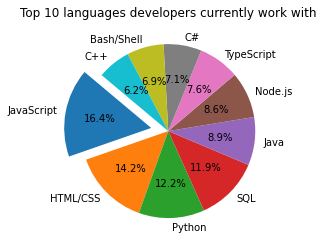

In [40]:
# Labels for the sections of our pie chart
labels = top10current[0]
sizes = top10current[1]
explode = (0.2, 0,0,0,0,0,0,0,0,0)
plt.pie(sizes, explode=explode, labels=labels, autopct="%1.1f%%", startangle=140)
plt.title('Top 10 languages developers currently work with')
plt.show()


ValueError: 'explode' must be of length 'x'

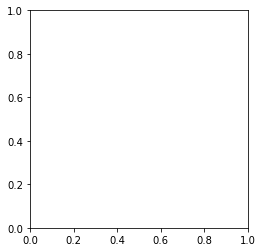

In [45]:

# Labels for the sections of our pie chart
labels = top10future[0]
sizes = top10future[1]
explode = (0.2, 0,0,0,0,0,0,0,0,0)
plt.pie(sizes, explode=explode, labels=labels, autopct="%1.1f%%", startangle=140)
plt.title('Top 10 languages developers want to work with')
plt.show()



In [51]:
# pull main data frame and isolate only people that have javascript in full_df['LanguageHaveWorkedWith']
# Code goes through the LanguageHaveWorkedWith series and looks for the string JavaScript within the series.  Once it finds
# all instances it creates a new data frame with just those rows.  The Row count is equal to the count we did in the 
# beginning '53587'.  This way we can check that it is the correct amount.
find_js_df = full_df.loc[full_df['LanguageHaveWorkedWith'].str.contains('JavaScript',  case = False, na=False)]
find_js_df['LanguageHaveWorkedWith']

0            C++;HTML/CSS;JavaScript;Objective-C;PHP;Swift
1                                        JavaScript;Python
3                                    JavaScript;TypeScript
5        C;C#;C++;HTML/CSS;Java;JavaScript;Node.js;Powe...
6                                      HTML/CSS;JavaScript
                               ...                        
83426       Bash/Shell;HTML/CSS;Java;JavaScript;Python;SQL
83431    C#;Dart;HTML/CSS;Java;JavaScript;Kotlin;Node.j...
83433        Java;JavaScript;Kotlin;Objective-C;TypeScript
83437                 Bash/Shell;JavaScript;Node.js;Python
83438               Delphi;Elixir;HTML/CSS;Java;JavaScript
Name: LanguageHaveWorkedWith, Length: 53587, dtype: object